In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./data/dga_data.csv')

In [5]:
# Display the first 5 rows
df.head()

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker


In [6]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   isDGA     160000 non-null  object
 1   domain    159998 non-null  object
 2   host      160000 non-null  object
 3   subclass  160000 non-null  object
dtypes: object(4)
memory usage: 4.9+ MB


isDGA
dga      80000
legit    80000
Name: count, dtype: int64


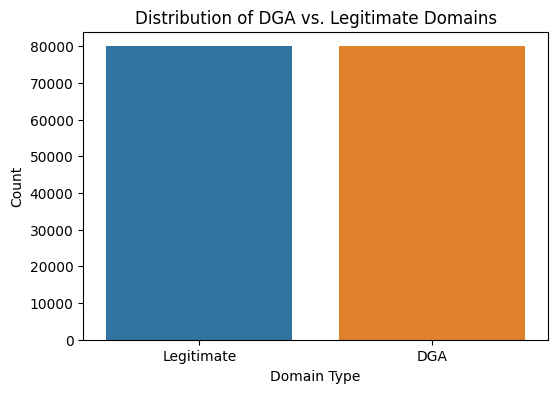

In [8]:
# Check the distribution of the 'dga' column
print(df['isDGA'].value_counts())

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isDGA', data=df)
plt.title('Distribution of DGA vs. Legitimate Domains')
plt.xlabel('Domain Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'DGA'])
plt.savefig('dga_distribution.png')
plt.show()

In [9]:
# Create a 'length' feature
df['length'] = df['domain'].str.len()

# Display the first 5 rows with the new feature
df.head()

,isDGA,domain,host,subclass,length
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga,26.0
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker,14.0
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker,14.0
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz,25.0
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker,12.0


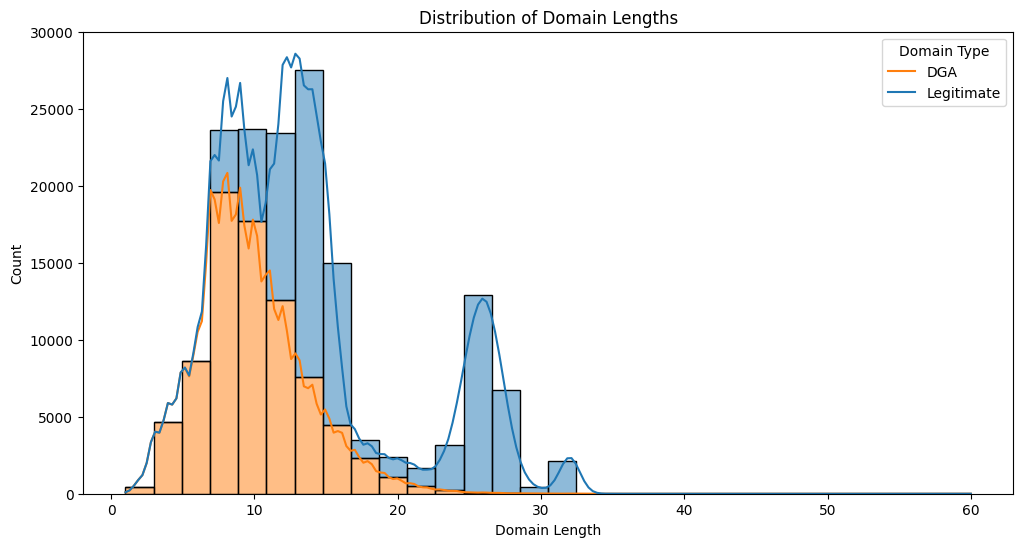

In [11]:
# Plot the distribution of domain lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='length', hue='isDGA', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Domain Lengths')
plt.xlabel('Domain Length')
plt.ylabel('Count')
plt.legend(title='Domain Type', labels=['DGA', 'Legitimate'])
plt.savefig('domain_length_distribution.png')
plt.show()

In [13]:
# Summary statistics of length for each class
df.groupby('isDGA')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
isDGA,,,,,,,,
dga,80000.0,17.213438,6.72987,7.0,12.0,14.0,25.0,32.0
legit,79998.0,9.721406,3.80186,1.0,7.0,9.0,12.0,60.0


🔍 DGA Model Evaluation System
Model loaded from c:\Users\Abhinaya\hello world\FP-SOC\models
✅ Model loaded successfully!
Loading data from c:\Users\Abhinaya\hello world\FP-SOC\data\dga_data.csv...
Loaded 159998 domain records
Class distribution: {'dga': 80000, 'legitimate': 79998}
Test set size: 32000 domains
🔍 Starting model evaluation...


Extracting features: 100%|██████████| 32000/32000 [00:00<00:00, 43236.74it/s]


1000/1000 [==============================] - 62s 61ms/step
✅ Model evaluation completed!

🎯 DGA MODEL EVALUATION SUMMARY
📊 ACCURACY METRICS:
   • Accuracy:  0.9936
   • Precision: 0.9971
   • Recall:    0.9901
   • F1-Score:  0.9936
   • ROC AUC:   0.9998
   • PR AUC:    0.9998

📈 CONFUSION MATRIX:
   True Negatives (TN):  15954
   False Positives (FP): 46
   False Negatives (FN): 158
   True Positives (TP):  15842

🎯 DETAILED METRICS:
   • Sensitivity (TPR): 0.9901
   • Specificity (TNR): 0.9971
   • False Positive Rate: 0.0029
   • False Negative Rate: 0.0099

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  Legitimate     0.9902    0.9971    0.9936     16000
         DGA     0.9971    0.9901    0.9936     16000

    accuracy                         0.9936     32000
   macro avg     0.9936    0.9936    0.9936     32000
weighted avg     0.9936    0.9936    0.9936     32000


📊 Creating visualizations...


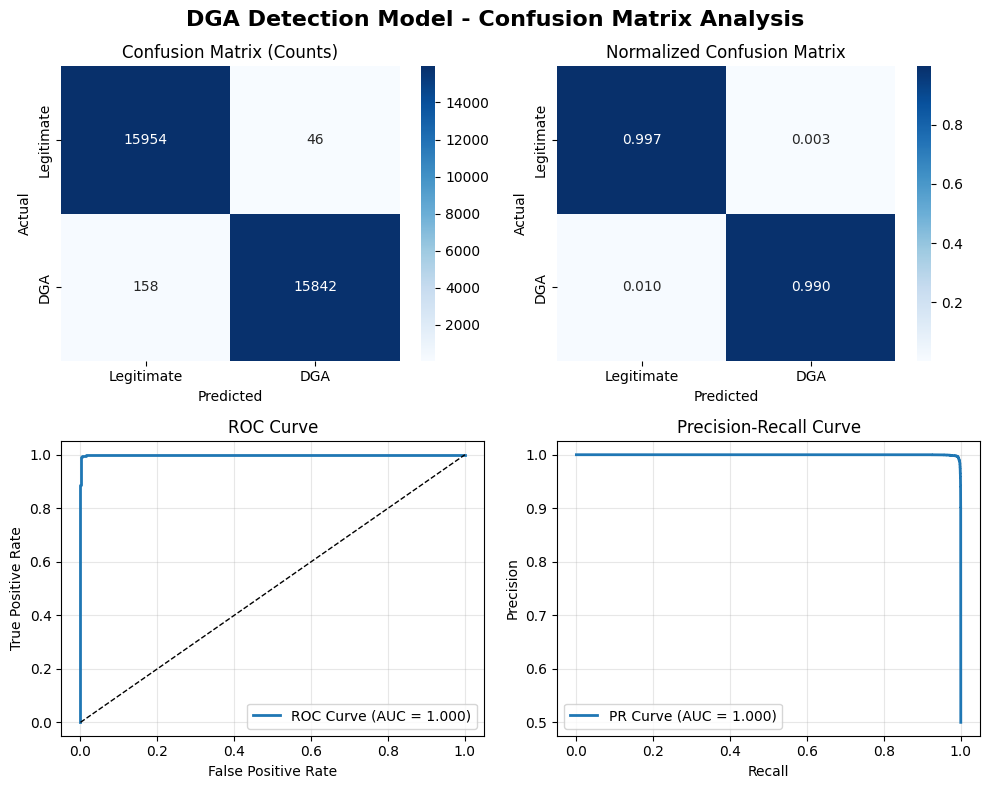

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


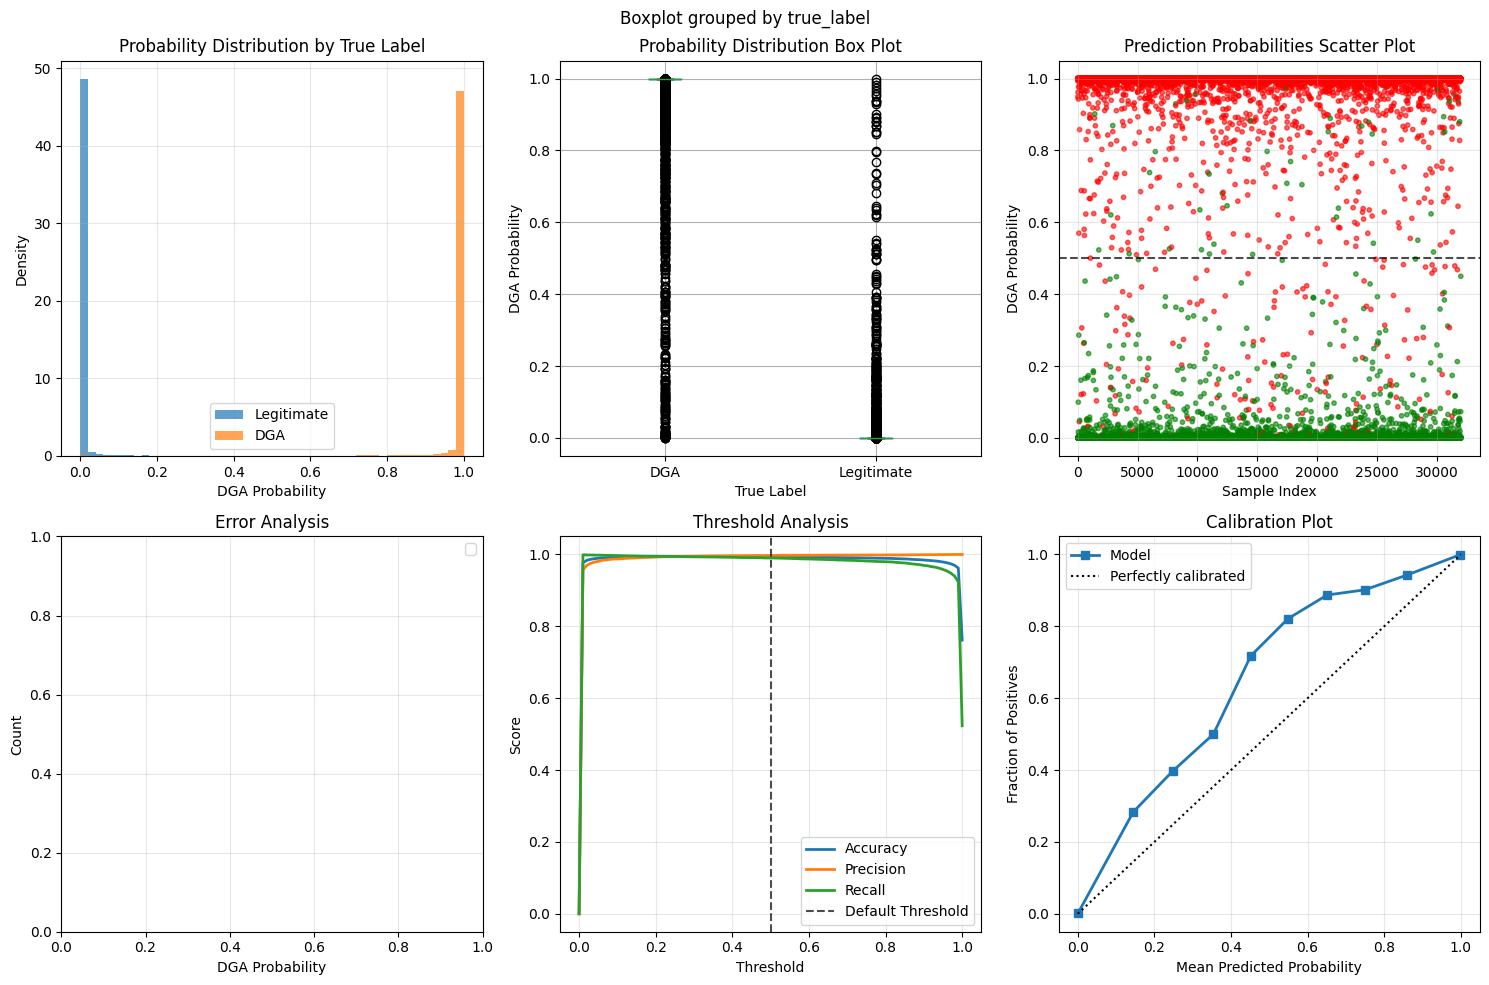

Evaluation report exported to dga_evaluation_report.txt

✅ Model evaluation completed successfully!


In [19]:
"""
DGA Model Evaluation System
Comprehensive evaluation toolkit for DGA detection neural network model
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import dari main.py (pastikan file config.py tersedia)
try:
    from main import DGAAnalyzer
    from config import *
except ImportError:
    print("Warning: Could not import from main.py or config.py")
    # Fallback configurations
    DGA_DATA_FILE = "dga_data.csv"
    MODEL_PATH = "models"

class DGAModelEvaluator:
    """
    Comprehensive evaluation system for DGA detection model
    """
    
    def __init__(self, analyzer=None):
        self.analyzer = analyzer
        self.test_data = None
        self.predictions = None
        self.probabilities = None
        self.y_true = None
        self.y_pred = None
        self.evaluation_results = {}
        
    def load_and_prepare_test_data(self, data_file=None, test_size=0.2):
        """
        Load and prepare test data for evaluation
        """
        if data_file is None:
            data_file = DGA_DATA_FILE
            
        print(f"Loading data from {data_file}...")
        df = pd.read_csv(data_file)
        
        # Clean data
        df.dropna(subset=['domain'], inplace=True)
        df['domain'] = df['domain'].astype(str)
        df['isDGA'] = df['isDGA'].apply(lambda x: 'dga' if x == 'dga' else 'legitimate')
        
        print(f"Loaded {len(df)} domain records")
        print(f"Class distribution: {df['isDGA'].value_counts().to_dict()}")
        
        # Split data for evaluation
        train_df, test_df = train_test_split(
            df, test_size=test_size, random_state=42, 
            stratify=df['isDGA']
        )
        
        self.test_data = test_df
        print(f"Test set size: {len(test_df)} domains")
        return test_df
    
    def evaluate_model(self, test_df=None):
        """
        Comprehensive model evaluation
        """
        if test_df is None:
            test_df = self.test_data
            
        if test_df is None:
            raise ValueError("No test data available. Please load data first.")
            
        if self.analyzer is None or not self.analyzer.is_trained:
            raise ValueError("Model not trained or analyzer not provided.")
        
        print("🔍 Starting model evaluation...")
        
        # Get predictions
        domains = test_df['domain'].tolist()
        predictions = self.analyzer.predict(domains)
        
        # Extract results
        self.y_true = test_df['isDGA'].map({'legitimate': 0, 'dga': 1}).values
        self.y_pred = [1 if pred['is_dga'] else 0 for pred in predictions]
        self.probabilities = [pred['dga_probability'] for pred in predictions]
        
        # Calculate metrics
        self.evaluation_results = {
            'accuracy': accuracy_score(self.y_true, self.y_pred),
            'precision': precision_score(self.y_true, self.y_pred),
            'recall': recall_score(self.y_true, self.y_pred),
            'f1_score': f1_score(self.y_true, self.y_pred),
            'confusion_matrix': confusion_matrix(self.y_true, self.y_pred)
        }
        
        # ROC curve
        fpr, tpr, _ = roc_curve(self.y_true, self.probabilities)
        self.evaluation_results['roc_auc'] = auc(fpr, tpr)
        self.evaluation_results['fpr'] = fpr
        self.evaluation_results['tpr'] = tpr
        
        # Precision-Recall curve
        precision, recall, _ = precision_recall_curve(self.y_true, self.probabilities)
        self.evaluation_results['pr_auc'] = average_precision_score(self.y_true, self.probabilities)
        self.evaluation_results['precision_curve'] = precision
        self.evaluation_results['recall_curve'] = recall
        
        print("✅ Model evaluation completed!")
        return self.evaluation_results
    
    def print_evaluation_summary(self):
        """
        Print comprehensive evaluation summary
        """
        if not self.evaluation_results:
            print("No evaluation results available. Please run evaluate_model() first.")
            return
        
        print("\n" + "="*60)
        print("🎯 DGA MODEL EVALUATION SUMMARY")
        print("="*60)
        
        print(f"📊 ACCURACY METRICS:")
        print(f"   • Accuracy:  {self.evaluation_results['accuracy']:.4f}")
        print(f"   • Precision: {self.evaluation_results['precision']:.4f}")
        print(f"   • Recall:    {self.evaluation_results['recall']:.4f}")
        print(f"   • F1-Score:  {self.evaluation_results['f1_score']:.4f}")
        print(f"   • ROC AUC:   {self.evaluation_results['roc_auc']:.4f}")
        print(f"   • PR AUC:    {self.evaluation_results['pr_auc']:.4f}")
        
        print(f"\n📈 CONFUSION MATRIX:")
        cm = self.evaluation_results['confusion_matrix']
        print(f"   True Negatives (TN):  {cm[0,0]}")
        print(f"   False Positives (FP): {cm[0,1]}")
        print(f"   False Negatives (FN): {cm[1,0]}")
        print(f"   True Positives (TP):  {cm[1,1]}")
        
        # Calculate additional metrics
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        print(f"\n🎯 DETAILED METRICS:")
        print(f"   • Sensitivity (TPR): {sensitivity:.4f}")
        print(f"   • Specificity (TNR): {specificity:.4f}")
        print(f"   • False Positive Rate: {fp/(fp+tn):.4f}")
        print(f"   • False Negative Rate: {fn/(fn+tp):.4f}")
        
        # Classification report
        print(f"\n📋 CLASSIFICATION REPORT:")
        print(classification_report(self.y_true, self.y_pred, 
                                   target_names=['Legitimate', 'DGA'],
                                   digits=4))
    
    def plot_confusion_matrix_heatmap(self, figsize=(10, 8)):
        """
        Create confusion matrix heatmap visualization
        """
        if not self.evaluation_results:
            print("No evaluation results available.")
            return None
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle('DGA Detection Model - Confusion Matrix Analysis', fontsize=16, fontweight='bold')
        
        cm = self.evaluation_results['confusion_matrix']
        
        # 1. Raw confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Legitimate', 'DGA'],
                   yticklabels=['Legitimate', 'DGA'],
                   ax=axes[0,0])
        axes[0,0].set_title('Confusion Matrix (Counts)')
        axes[0,0].set_xlabel('Predicted')
        axes[0,0].set_ylabel('Actual')
        
        # 2. Normalized confusion matrix
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                   xticklabels=['Legitimate', 'DGA'],
                   yticklabels=['Legitimate', 'DGA'],
                   ax=axes[0,1])
        axes[0,1].set_title('Normalized Confusion Matrix')
        axes[0,1].set_xlabel('Predicted')
        axes[0,1].set_ylabel('Actual')
        
        # 3. ROC Curve
        axes[1,0].plot(self.evaluation_results['fpr'], self.evaluation_results['tpr'], 
                      linewidth=2, label=f'ROC Curve (AUC = {self.evaluation_results["roc_auc"]:.3f})')
        axes[1,0].plot([0, 1], [0, 1], 'k--', linewidth=1)
        axes[1,0].set_xlabel('False Positive Rate')
        axes[1,0].set_ylabel('True Positive Rate')
        axes[1,0].set_title('ROC Curve')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 4. Precision-Recall Curve
        axes[1,1].plot(self.evaluation_results['recall_curve'], 
                      self.evaluation_results['precision_curve'],
                      linewidth=2, label=f'PR Curve (AUC = {self.evaluation_results["pr_auc"]:.3f})')
        axes[1,1].set_xlabel('Recall')
        axes[1,1].set_ylabel('Precision')
        axes[1,1].set_title('Precision-Recall Curve')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig
    
    def plot_prediction_distribution(self, figsize=(15, 10)):
        """
        Plot prediction probability distributions and analysis
        """
        if self.probabilities is None:
            print("No predictions available.")
            return None
        
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle('DGA Detection Model - Prediction Analysis', fontsize=16, fontweight='bold')
        
        # Prepare data
        prob_df = pd.DataFrame({
            'probability': self.probabilities,
            'true_label': ['DGA' if x == 1 else 'Legitimate' for x in self.y_true],
            'predicted_label': ['DGA' if x == 1 else 'Legitimate' for x in self.y_pred]
        })
        
        # 1. Probability distribution by true label
        for label in ['Legitimate', 'DGA']:
            data = prob_df[prob_df['true_label'] == label]['probability']
            axes[0,0].hist(data, alpha=0.7, bins=50, label=label, density=True)
        axes[0,0].set_xlabel('DGA Probability')
        axes[0,0].set_ylabel('Density')
        axes[0,0].set_title('Probability Distribution by True Label')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Box plot of probabilities
        prob_df.boxplot(column='probability', by='true_label', ax=axes[0,1])
        axes[0,1].set_title('Probability Distribution Box Plot')
        axes[0,1].set_xlabel('True Label')
        axes[0,1].set_ylabel('DGA Probability')
        
        # 3. Scatter plot of probabilities
        colors = ['green' if x == 'Legitimate' else 'red' for x in prob_df['true_label']]
        axes[0,2].scatter(range(len(self.probabilities)), self.probabilities, 
                         c=colors, alpha=0.6, s=10)
        axes[0,2].axhline(y=0.5, color='black', linestyle='--', alpha=0.7)
        axes[0,2].set_xlabel('Sample Index')
        axes[0,2].set_ylabel('DGA Probability')
        axes[0,2].set_title('Prediction Probabilities Scatter Plot')
        axes[0,2].grid(True, alpha=0.3)
        
        # 4. Error analysis - False Positives and False Negatives
        fp_mask = (self.y_true == 0) & (self.y_pred == 1)
        fn_mask = (self.y_true == 1) & (self.y_pred == 0)
        
        if np.any(fp_mask):
            axes[1,0].hist(np.array(self.probabilities)[fp_mask], 
                          bins=20, alpha=0.7, color='orange', label='False Positives')
        if np.any(fn_mask):
            axes[1,0].hist(np.array(self.probabilities)[fn_mask], 
                          bins=20, alpha=0.7, color='purple', label='False Negatives')
        axes[1,0].set_xlabel('DGA Probability')
        axes[1,0].set_ylabel('Count')
        axes[1,0].set_title('Error Analysis')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 5. Threshold analysis
        thresholds = np.linspace(0, 1, 100)
        accuracies = []
        precisions = []
        recalls = []
        
        for threshold in thresholds:
            y_pred_thresh = (np.array(self.probabilities) >= threshold).astype(int)
            if len(np.unique(y_pred_thresh)) > 1:
                accuracies.append(accuracy_score(self.y_true, y_pred_thresh))
                precisions.append(precision_score(self.y_true, y_pred_thresh))
                recalls.append(recall_score(self.y_true, y_pred_thresh))
            else:
                accuracies.append(0)
                precisions.append(0)
                recalls.append(0)
        
        axes[1,1].plot(thresholds, accuracies, label='Accuracy', linewidth=2)
        axes[1,1].plot(thresholds, precisions, label='Precision', linewidth=2)
        axes[1,1].plot(thresholds, recalls, label='Recall', linewidth=2)
        axes[1,1].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Default Threshold')
        axes[1,1].set_xlabel('Threshold')
        axes[1,1].set_ylabel('Score')
        axes[1,1].set_title('Threshold Analysis')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        # 6. Calibration plot
        from sklearn.calibration import calibration_curve
        fraction_of_positives, mean_predicted_value = calibration_curve(
            self.y_true, self.probabilities, n_bins=10
        )
        axes[1,2].plot(mean_predicted_value, fraction_of_positives, "s-", linewidth=2, label="Model")
        axes[1,2].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
        axes[1,2].set_xlabel('Mean Predicted Probability')
        axes[1,2].set_ylabel('Fraction of Positives')
        axes[1,2].set_title('Calibration Plot')
        axes[1,2].legend()
        axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig
    
    def create_interactive_dashboard(self):
        """
        Create interactive Plotly dashboard for model evaluation
        """
        if not self.evaluation_results:
            print("No evaluation results available.")
            return None
        
        # Create subplots
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Confusion Matrix', 'ROC Curve', 
                          'Precision-Recall Curve', 'Probability Distribution'),
            specs=[[{"type": "heatmap"}, {"type": "scatter"}],
                   [{"type": "scatter"}, {"type": "histogram"}]]
        )
        
        # 1. Confusion Matrix
        cm = self.evaluation_results['confusion_matrix']
        fig.add_trace(
            go.Heatmap(
                z=cm,
                x=['Legitimate', 'DGA'],
                y=['Legitimate', 'DGA'],
                colorscale='Blues',
                text=cm,
                texttemplate="%{text}",
                textfont={"size": 20},
                hoverongaps=False
            ),
            row=1, col=1
        )
        
        # 2. ROC Curve
        fig.add_trace(
            go.Scatter(
                x=self.evaluation_results['fpr'],
                y=self.evaluation_results['tpr'],
                mode='lines',
                name=f'ROC (AUC={self.evaluation_results["roc_auc"]:.3f})',
                line=dict(width=3)
            ),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(
                x=[0, 1], y=[0, 1],
                mode='lines',
                name='Random',
                line=dict(dash='dash', color='gray')
            ),
            row=1, col=2
        )
        
        # 3. Precision-Recall Curve
        fig.add_trace(
            go.Scatter(
                x=self.evaluation_results['recall_curve'],
                y=self.evaluation_results['precision_curve'],
                mode='lines',
                name=f'PR (AUC={self.evaluation_results["pr_auc"]:.3f})',
                line=dict(width=3)
            ),
            row=2, col=1
        )
        
        # 4. Probability Distribution
        legitimate_probs = [p for p, t in zip(self.probabilities, self.y_true) if t == 0]
        dga_probs = [p for p, t in zip(self.probabilities, self.y_true) if t == 1]
        
        fig.add_trace(
            go.Histogram(
                x=legitimate_probs,
                name='Legitimate',
                opacity=0.7,
                nbinsx=50
            ),
            row=2, col=2
        )
        fig.add_trace(
            go.Histogram(
                x=dga_probs,
                name='DGA',
                opacity=0.7,
                nbinsx=50
            ),
            row=2, col=2
        )
        
        # Update layout
        fig.update_layout(
            title_text="DGA Detection Model - Interactive Evaluation Dashboard",
            title_x=0.5,
            height=800,
            showlegend=True
        )
        
        return fig
    
    def export_evaluation_report(self, filename="dga_evaluation_report.txt"):
        """
        Export comprehensive evaluation report to text file
        """
        if not self.evaluation_results:
            print("No evaluation results available.")
            return
        
        with open(filename, 'w') as f:
            f.write("DGA DETECTION MODEL - EVALUATION REPORT\n")
            f.write("="*50 + "\n\n")
            
            f.write("PERFORMANCE METRICS:\n")
            f.write(f"Accuracy:  {self.evaluation_results['accuracy']:.4f}\n")
            f.write(f"Precision: {self.evaluation_results['precision']:.4f}\n")
            f.write(f"Recall:    {self.evaluation_results['recall']:.4f}\n")
            f.write(f"F1-Score:  {self.evaluation_results['f1_score']:.4f}\n")
            f.write(f"ROC AUC:   {self.evaluation_results['roc_auc']:.4f}\n")
            f.write(f"PR AUC:    {self.evaluation_results['pr_auc']:.4f}\n\n")
            
            f.write("CONFUSION MATRIX:\n")
            cm = self.evaluation_results['confusion_matrix']
            f.write(f"True Negatives:  {cm[0,0]}\n")
            f.write(f"False Positives: {cm[0,1]}\n")
            f.write(f"False Negatives: {cm[1,0]}\n")
            f.write(f"True Positives:  {cm[1,1]}\n\n")
            
            f.write("CLASSIFICATION REPORT:\n")
            f.write(classification_report(self.y_true, self.y_pred, 
                                        target_names=['Legitimate', 'DGA']))
        
        print(f"Evaluation report exported to {filename}")

def main():
    """
    Main function for model evaluation
    """
    print("🔍 DGA Model Evaluation System")
    print("="*50)
    
    # Initialize components
    analyzer = DGAAnalyzer()
    evaluator = DGAModelEvaluator(analyzer)
    
    # Load model
    if not analyzer.load_model():
        print("❌ Could not load trained model. Please train the model first.")
        return
    
    print("✅ Model loaded successfully!")
    
    # Load test data
    try:
        test_df = evaluator.load_and_prepare_test_data()
    except Exception as e:
        print(f"❌ Error loading test data: {e}")
        return
    
    # Evaluate model
    try:
        results = evaluator.evaluate_model(test_df)
        evaluator.print_evaluation_summary()
        
        # Create visualizations
        print("\n📊 Creating visualizations...")
        
        # Confusion matrix heatmap
        fig1 = evaluator.plot_confusion_matrix_heatmap()
        if fig1:
            plt.show()
        
        # Prediction distribution analysis
        fig2 = evaluator.plot_prediction_distribution()
        if fig2:
            plt.show()
        
        # Interactive dashboard
        try:
            dashboard = evaluator.create_interactive_dashboard()
            if dashboard:
                dashboard.show()
        except Exception as e:
            print(f"Warning: Could not create interactive dashboard: {e}")
        
        # Export report
        evaluator.export_evaluation_report()
        
        print("\n✅ Model evaluation completed successfully!")
        
    except Exception as e:
        print(f"❌ Error during evaluation: {e}")

if __name__ == "__main__":
    main()